# Scoping

### Project Goals

This project is designed to utilize the skills I have learned and apply machine learning techniques to a data set. I went into this project blind and thus this project is meant to outline my method to understand and refine a dataset from scratch and derive insights from it. The initial guidance I recieved was to decide a research question at this point but without understanding the contents of a dataset, its limits and quirks, that would in my humble opinion be impossible to do.

### Methodology

My Method is inspired by the one provided in: {insert book title here} (which is available neatly in appendix B pg. 497). 

However, against the apparent rigid and formulaic nature of the method provided therin I prefer to keep my processes iterative (recursive in a way) and dynamic. The format of this document may lead to you believr that I have gone about this project in clear steps and stages but this is mostly a function of the need for presentability and concistency. The process here is iterative and dynamic.
    
(Especially between the cleaning and exploratitory parts there is a lot of back and forth in understanding and refining the dataset to a state of usability I deem acceptable.)

1. Preliminary Analysis- Preparation for test integrity and studying of each attribute, its noisiness, distribution and possible usefulness for the task ahead.
2. Cleaning Data - serves primarily as a cleaning of the dataset but also as an initial analysis of each of the attributes. (This is exhaustive but also good practice in refining a dataset)
3. Exploratory Analysis - Explore the datasets relationships and patterns (Note: this is done after the clean so as to not have the exploration biased by missing values, incorrect inputs e.tc )
4. Framing - Decide and Assess an objective, think about what a solution would look like, how I would measure its performance and list assumptions.
5. Experimentation and refienment - testing models, validating them and evaluating them.
6. Presentation and Interpretation - show the results and interpet them in the context of the research question

The primary research question that I have detemerined to be answered is that of whether

### Assumptions


# Import Python Modules
First things first is to import the python modules I will be using for this project.

In [3433]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Preliminary Analysis

### Loading the Data

The first step I take is to load the provided data into a pandas DataFrame object so that it can be efficiently explored and manipulated in python.

This involves the file `profiles.csv` being loaded into the `df` DataFrame. It is subsequently displayed for examination.

In [3434]:
df = pd.read_csv('profiles.csv', encoding = 'utf-8')
df.reset_index()
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\r\n<br />\r\ni would love to t...,currently working as an international agent fo...,making people laugh.<br />\r\nranting about a ...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\r\...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\r\nhttp://b...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


Straight away I can tell there is no point in looking at the value counts of the `essay{number}` columns as they are more likely infinitely variable, will not have any repeating entries and this project doesn't involve NLP. Let's drop them immediately.

In [3435]:
essays = [f'essay{i}' for i in range(0, 10, 1)]
df.drop(essays, axis = 1, inplace = True)

### Identifying the Data Characteristics

First it is advisable to look at the data types and columns presented to us in the data and determine how much data we are dealing with exactly.

Doing a few simple calls to variables of the dataframe reveals that our dating profiles data consists of 59,946 rows (or users) and 31 attributes/columns.

Each column's name is sort of self descriptive of what sort of information is expected therein so there is no need to elaborate them here, any nuance within them will be explained in further parts.

In [3436]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   ethnicity    54266 non-null  object 
 7   height       59943 non-null  float64
 8   income       59946 non-null  int64  
 9   job          51748 non-null  object 
 10  last_online  59946 non-null  object 
 11  location     59946 non-null  object 
 12  offspring    24385 non-null  object 
 13  orientation  59946 non-null  object 
 14  pets         40025 non-null  object 
 15  religion     39720 non-null  object 
 16  sex          59946 non-null  object 
 17  sign         48890 non-null  object 
 18  smokes       54434 non-null  object 
 19  spea

### Setting Asside A Sample Test Set

This ensures we keep data snooping bias out of our project! The dataset is quite large so I am assuming there is no need for stratefied samplinh

# Data Cleaning

First up is to clean the data and make sure it is suitable for use. My cleaning process for a single dataset consists of five steps:


1. Handling duplicates and rows
2. Simplifying and standardizng attributes 
3. Handling missing values
4. Handling outliers
5. Handling inconsitent attributes 

## Handling Duplicates

First let's check if there are any duplicate entries in the dataset.

In [3437]:
df.duplicated().sum()

np.int64(0)

Looks like we are all clear on duplicate entries.

## Simplifying attributes

This section's general aim is to simplify primarily categorical attributes that have way too many different catagories and potentially give NA entries actual values.

From a brief look at the number of unique values and a little reference back up to our dtypes (plus a little behind the scenes checks on value counts) we can see that a few columns are up for a little simplification, these being:

1. education
2. ethnicity
3. speaks
4. pets
5. religion
6. sign
7. speaks
8. diet

Additionally we want to sort out the corrupted strings in:
1. offspring
2. sign

#NOTE INCOME IS FUNNY AS IT MIGHT AS WELL BE CATEGORICAL AS IT IS A SET OF NUMERICAL BRACKETS (ie. 20000, 100000, 80000) that people are put under.

In [3438]:
df.nunique()


age               54
body_type         12
diet              18
drinks             6
drugs              3
education         32
ethnicity        217
height            60
income            13
job               21
last_online    30123
location         199
offspring         15
orientation        3
pets              15
religion          45
sex                2
sign              48
smokes             5
speaks          7647
status             5
dtype: int64

### Simplifying Education

In [3439]:
df.education.value_counts(dropna = False)

education
graduated from college/university    23959
graduated from masters program        8961
NaN                                   6628
working on college/university         5712
working on masters program            1683
graduated from two-year college       1531
graduated from high school            1428
graduated from ph.d program           1272
graduated from law school             1122
working on two-year college           1074
dropped out of college/university      995
working on ph.d program                983
college/university                     801
graduated from space camp              657
dropped out of space camp              523
graduated from med school              446
working on space camp                  445
working on law school                  269
two-year college                       222
working on med school                  212
dropped out of two-year college        191
dropped out of masters program         140
masters program                        136
d

In [3440]:
def replacer(lst, x, string1 = None):
    if isinstance(x, str):
        for l in lst:
            if l.lower() in x.lower():
                return l
        if isinstance(string1, str):
            return string1
    else:
        return pd.NA

In [3441]:
#create new column for education level
edu = ['space camp', 'high school', 'two-year college', 'college/university', 'law school', 'med school', 'masters', 'ph.d']
df['education_level'] = df['education'].apply(lambda x: replacer(edu, x))

#create new column for education status 
edu = ['dropped out', 'working on', 'graduated']
df['education_status'] = df['education'].apply(lambda x: replacer(edu, x, 'graduated'))

#get rid of the old education column
df.drop(columns = 'education', inplace = True)
df.education_status.value_counts(dropna = False)

education_status
graduated      40745
working on     10465
<NA>            6628
dropped out     2108
Name: count, dtype: int64

### Simplifying Ethnicity

In [3442]:
df.ethnicity.head(10)

0           asian, white
1                  white
2                    NaN
3                  white
4    asian, black, other
5                  white
6           white, other
7                  white
8                  white
9                  white
Name: ethnicity, dtype: object

In [3443]:
df['ethnicity'].value_counts(dropna = False)

ethnicity
white                                                                               32831
asian                                                                                6134
NaN                                                                                  5680
hispanic / latin                                                                     2823
black                                                                                2008
                                                                                    ...  
asian, black, pacific islander, hispanic / latin, white                                 1
asian, native american, indian, pacific islander, hispanic / latin, white, other        1
asian, middle eastern, black, pacific islander, hispanic / latin                        1
asian, black, pacific islander, white, other                                            1
asian, black, indian                                                                    1


One of first things we can notice about our ethnicity values is that there are a lot of people who are an ethnicity onto themselves, which might be interesting for anthropologists but unfortunately for us is not very good for ML models as they aren't very generalizable.

Let's make things a bit simpler and of course this involves an assumption:

1. If a person has multiple ethnicities (more than 3) they can be assumed to be part of a group (mixed) and that this group can be generalized to be the same and the patterns in the data are still maintained. (FLAWED?)

The rest will be simplified by splitting people into their primary and secondary ethnicity (the majority of the dataset adheres to this cleanly) while people with multiple ethnicities will be put down as mixed for both ethnicity 1 and 2.

In [3444]:
#This is a little helper function made to cut down any multiple ethnicity entires into something more palatable.
#Comments explain what it does for this particualr attribute.
def long_handler(x, string1):
    if isinstance(x, str):
        x = x.split(",")

        if len(x) < 3:
            if len(x) == 1:
                return(x.pop()) # if someone is just 1 ethnicity than return that one ethnicity
            else:
                return x # if someone is two ethnicities than just send those back too
        else:
            return string1 #if the number of ethnicities a person is, is greater than 3 then return them as mixed
    
    else:
        return pd.NA #if the entry is N/A or somehow not a string then return N/A


In [3445]:
df.ethnicity = df.ethnicity.apply(lambda x: long_handler(x, 'mixed'))
df["ethnicity_1"] = df.ethnicity.apply(lambda x: x[0] if isinstance(x, list) else x)
df["ethnicity_2"] = df.ethnicity.apply(lambda x: x[1] if isinstance(x, list) else x)

df.drop(columns = ['ethnicity'], inplace = True)

df[["ethnicity_1", "ethnicity_2"]].head(10)

,ethnicity_1,ethnicity_2
0,asian,white
1,white,white
2,<NA>,<NA>
3,white,white
4,mixed,mixed
5,white,white
6,white,other
7,white,white
8,white,white
9,white,white


### Simplifying Pets

In [3446]:
df.pets.value_counts(dropna = False)

pets
NaN                                19921
likes dogs and likes cats          14814
likes dogs                          7224
likes dogs and has cats             4313
has dogs                            4134
has dogs and likes cats             2333
likes dogs and dislikes cats        2029
has dogs and has cats               1474
has cats                            1406
likes cats                          1063
has dogs and dislikes cats           552
dislikes dogs and likes cats         240
dislikes dogs and dislikes cats      196
dislikes cats                        122
dislikes dogs and has cats            81
dislikes dogs                         44
Name: count, dtype: int64

The `pets` column has a lot of different categories but can be easily simplified into two columns where cat and dog dispositions are represented seperately.

In [3447]:
#Another little helper function made to seprate our pet lovers opinions on cats and dogs clearly.
def pet_sentiment(x, pet: str):

    if isinstance(x, str):
        if " and " in x:
            result = x.split(" and ")
            if pet == 'dog':
                result1 = result[0].removesuffix(" dogs")
                return result1
            elif pet == 'cat':
                result2 = result[1].removesuffix(" cats")
                return result2
    
        elif  pet == 'dog':
            if "dogs" in x:
                result1 = x.removesuffix(" dogs")
                return result1
            else:
                return 'no opinion'
        elif pet == 'cat':
            if "cats" in x:
                result2 = x.removesuffix(" cats")
                return result2
            else:
                return 'no opinion'
    else:   
        return pd.NA

In [3448]:
df['dogs'] = df.pets.apply(lambda x: pet_sentiment(x, 'dog'))
df['cats'] = df.pets.apply(lambda x: pet_sentiment(x, 'cat'))

df.drop(columns = ['pets'], inplace = True)

df[['cats', 'dogs']].head(20)

,cats,dogs
0,likes,likes
1,likes,likes
2,has,no opinion
3,likes,no opinion
4,likes,likes
5,likes,no opinion
6,likes,likes
7,likes,likes
8,likes,likes
9,likes,likes


### Simplifying `religion`

In [3449]:
df.religion.value_counts(dropna = False)

religion
NaN                                           20226
agnosticism                                    2724
other                                          2691
agnosticism but not too serious about it       2636
agnosticism and laughing about it              2496
catholicism but not too serious about it       2318
atheism                                        2175
other and laughing about it                    2119
atheism and laughing about it                  2074
christianity                                   1957
christianity but not too serious about it      1952
other but not too serious about it             1554
judaism but not too serious about it           1517
atheism but not too serious about it           1318
catholicism                                    1064
christianity and somewhat serious about it      927
atheism and somewhat serious about it           848
other and somewhat serious about it             846
catholicism and laughing about it               726
jud

Another attribute with a lot of N/A but looking at the actual data here we can clearly see that this attribute containts two specific parts of a persons religion. These being
1. Their actual religion
2. Their seriousness about it

So to capture this and reduce our possible values we can just cut it cleanly into the much more limited options of `religous_prefence` (8 possible values from my counts) and `religious_sentiment` (4 possible values) greatly reducing the possible values of this attribute from 45 possible values (excluding N/A) (Some entries don't have sentiment)

In [3450]:
def replacer(lst, x, string1 = None):
    if isinstance(x, str):
        for l in lst:
            if l.lower() in x.lower():
                return l
        if isinstance(string1, str):
            return string1
    else:
        return pd.NA

In [3451]:
religions = ['christianity', 'islam', 'judaism', 'buddhism', 'hinduism', 'agnosticism', 'atheism', 'other']
df['religious_preference'] = df.religion.apply(lambda x: replacer(religions, x))


sentiment = ['laughing about it', 'not too serious about it', 'somewhat serious about it', 'very serious about it']
df['religious_sentiment'] = df.religion.apply(lambda x: replacer(sentiment, x, 'no opinion'))

df.drop(columns = ['religion'], inplace = True)

In [3452]:
df[["religious_preference", "religious_sentiment"]].head(10)

,religious_preference,religious_sentiment
0,agnosticism,very serious about it
1,agnosticism,not too serious about it
2,<NA>,<NA>
3,<NA>,<NA>
4,<NA>,<NA>
5,atheism,no opinion
6,<NA>,<NA>
7,christianity,no opinion
8,christianity,not too serious about it
9,atheism,laughing about it


### Simplifying `sign`

In [3453]:
df.sign.value_counts(dropna = False)

sign
NaN                                              11056
gemini and it&rsquo;s fun to think about          1782
scorpio and it&rsquo;s fun to think about         1772
leo and it&rsquo;s fun to think about             1692
libra and it&rsquo;s fun to think about           1649
taurus and it&rsquo;s fun to think about          1640
cancer and it&rsquo;s fun to think about          1597
pisces and it&rsquo;s fun to think about          1592
sagittarius and it&rsquo;s fun to think about     1583
virgo and it&rsquo;s fun to think about           1574
aries and it&rsquo;s fun to think about           1573
aquarius and it&rsquo;s fun to think about        1503
virgo but it doesn&rsquo;t matter                 1497
leo but it doesn&rsquo;t matter                   1457
cancer but it doesn&rsquo;t matter                1454
gemini but it doesn&rsquo;t matter                1453
taurus but it doesn&rsquo;t matter                1450
aquarius but it doesn&rsquo;t matter              1408
libra

Sign is very similar to religion and can be handled similarly. Only we seem to have a problem with character encoding. That can be easily fixed however.

In [3454]:
df.sign = df.sign.apply(lambda x: x.replace('&rsquo;', "\'") if isinstance(x, str) else x)
star_signs = ['gemini', 'scorpio', 'leo', 'virgo', 'cancer', 'taurus', 'libra', 'aries', 'aquarius', 'pisces', 'capricorn', 'sagittarius']
df['star_sign'] = df.sign.apply(lambda x: replacer(star_signs, x))

sign_sentiment = ['it\'s fun to think about', 'it doesn\'t matter', 'it matters a lot']
df['sign_sentiment'] = df.sign.apply(lambda x: replacer(sign_sentiment, x, 'no opinion'))

df.drop(columns = ['sign'], inplace = True)

In [3455]:
df[['star_sign', 'sign_sentiment']].head(10)

,star_sign,sign_sentiment
0,gemini,no opinion
1,cancer,no opinion
2,pisces,it doesn't matter
3,pisces,no opinion
4,aquarius,no opinion
5,taurus,no opinion
6,virgo,no opinion
7,sagittarius,no opinion
8,gemini,it doesn't matter
9,cancer,it doesn't matter


### Simplifying `speaks`

In [3456]:
df.speaks.head(10)

0                                              english
1    english (fluently), spanish (poorly), french (...
2                                 english, french, c++
3                             english, german (poorly)
4                                              english
5                   english (fluently), chinese (okay)
6                                              english
7                              english, spanish (okay)
8                                              english
9                                   english (fluently)
Name: speaks, dtype: object

In [3457]:
df.speaks.value_counts(dropna = False)

speaks
english                                                                                              21828
english (fluently)                                                                                    6628
english (fluently), spanish (poorly)                                                                  2059
english (fluently), spanish (okay)                                                                    1917
english (fluently), spanish (fluently)                                                                1288
                                                                                                     ...  
english (fluently), polish (fluently), french (poorly), hungarian (poorly), italian (poorly)             1
english, spanish (fluently), hindi (okay), french (poorly)                                               1
english (okay), spanish (okay), hebrew (okay)                                                            1
english (fluently), slovenian 

For speaks we are going to try something different, while we could list all the different languages I feel capturing a person's english speaking ability would be a much more interesting attribute to have in our data. let's just check how many of our subjects actually speak english.

In [3458]:
print(len(df['speaks']))
speakeasy = df['speaks'].str.contains(r'english', case = False, na = False).sum()
int(speakeasy)

59946


59896

Initially it appears that 50 of our subjects don't speak any english, but with a little tweaking of the above function you can find that these subjects just have No language data. Which for now isn't that important, its just something to be aware of.

Now lets try and isolate the english part of each subjects language ability (if we have it of course).

In [3459]:
df["english"] = df.speaks.apply(lambda x: x.lower().split(",") if isinstance(x, str) else x) #turn each string into a list (luckily are languages are already comma-seperated)
df['english'] = df.english.apply(lambda x: [entry for entry in x if 'english' in entry.lower()] if isinstance(x, list) else None)
df['english'].value_counts(dropna = True)

english
[english]                                                                                                   29886
[english (fluently)]                                                                                        27969
[english (okay)]                                                                                             1053
[english (poorly)]                                                                                            592
[english,  english]                                                                                           115
[english,  english (fluently)]                                                                                114
[english (fluently),  english (fluently)]                                                                      32
[english (fluently),  english]                                                                                 30
[english (fluently),  english (poorly)]                                         

Seems like some of our entries put multiple levels of english in their languages. Let's fix that.

In [3460]:
english_scale = {'english(fluently)': 1, 'english': 2, 'english(okay)': 3, 'english(poorly)': 4} # create a string to hold my personal ranking of english fluency to handle multiple english entries.
def fix_english(english_list:list, scale:dict):
    current = english_list[0]
    if len(english_list) > 1:
        for i in range(1, len(english_list)):
            if english_scale[current] > english_scale[english_list[i]]:
                current = english_list[i]
        return current
    else:
        return current

df['english'] = df.english.apply(lambda x: [z.replace(" ", "") for z in x] if isinstance(x, list) else None)
df['english'] = df.english.apply(lambda x: fix_english(x, english_scale) if isinstance(x, list) else None)
df['english'].value_counts(dropna = True)

english
english              30024
english(fluently)    28216
english(okay)         1063
english(poorly)        593
Name: count, dtype: int64

And that's the english colomn sorted, looking a lot cleaner and a lot neater!

### Simplifying `offspring`

In [3461]:
df.offspring.value_counts()

offspring
doesn&rsquo;t have kids                                7560
doesn&rsquo;t have kids, but might want them           3875
doesn&rsquo;t have kids, but wants them                3565
doesn&rsquo;t want kids                                2927
has kids                                               1883
has a kid                                              1881
doesn&rsquo;t have kids, and doesn&rsquo;t want any    1132
has kids, but doesn&rsquo;t want more                   442
has a kid, but doesn&rsquo;t want more                  275
has a kid, and might want more                          231
wants kids                                              225
might want kids                                         182
has kids, and might want more                           115
has a kid, and wants more                                71
has kids, and wants more                                 21
Name: count, dtype: int64

let's keep things simple with this one and just refine it to those who have kids and those who do not

In [3462]:
def kids_handler(x):
    if isinstance(x, str):
        result = x.split(" kid")[0]
        if result == "has a":
            return "has"
        else:
            return "doesn't have"
    else:
        return pd.NA

In [3463]:
df.offspring = df.offspring.apply(lambda x: x.replace('&rsquo;', "\'") if isinstance(x, str) else x)
df['offspring'] = df.offspring.apply(lambda x: kids_handler(x))
df.offspring.value_counts(dropna = False)

offspring
<NA>            35561
doesn't have    21927
has              2458
Name: count, dtype: int64

### Simplifying `diet`

In [3464]:
df.diet.value_counts(dropna = True)

diet
mostly anything        16585
anything                6183
strictly anything       5113
mostly vegetarian       3444
mostly other            1007
strictly vegetarian      875
vegetarian               667
strictly other           452
mostly vegan             338
other                    331
strictly vegan           228
vegan                    136
mostly kosher             86
mostly halal              48
strictly halal            18
strictly kosher           18
halal                     11
kosher                    11
Name: count, dtype: int64

In [3465]:
diets = ['vegetarian', 'vegan', 'anything', 'kosher', 'halal', 'other']
df['diet'] = df['diet'].apply(lambda x: replacer(diets, x))

In [3466]:
df.diet.value_counts(dropna = False)

diet
anything      27881
<NA>          24395
vegetarian     4986
other          1790
vegan           702
kosher          115
halal            77
Name: count, dtype: int64

## Handling Missing Values

Next up is check which values have nulls and then handling them if they do in a way that is essentially up to my own discretion, however I try to use multiple techniques to handle nulls. 

If we check our columns we can see that theres a few rows that are 100% good to go on that front but beyond this we have a select few rows mainly on extraneous personal data that our users probably didn't want to or coulnd't be bothered to fill in.

My Null Handling Methodology:

1. Find how many values are missing + what percentage of the attribute is missing
2. Try and find out why they might be missing
3. Implement a solution to the nulls

In [3467]:
df.isna().sum().sort_values()

age                         0
income                      0
location                    0
status                      0
sex                         0
orientation                 0
last_online                 0
height                      3
speaks                     50
english                    50
drinks                   2985
body_type                5296
smokes                   5512
ethnicity_2              5680
ethnicity_1              5680
education_status         6628
education_level          6628
job                      8198
sign_sentiment          11056
star_sign               11056
drugs                   14080
dogs                    19921
cats                    19921
religious_sentiment     20226
diet                    24395
religious_preference    24984
offspring               35561
dtype: int64

### Removing High Null Rows

In [3468]:
print("DataFrame shape prior to removal: ", df.shape)
df['null_count'] = df.isna().sum(axis = 1)
df = df[df['null_count'] < (0.4 * df.shape[1])]
df.drop(columns = ['null_count'], inplace = True)
print("DataFrame shape post removal: ", df.shape)

DataFrame shape prior to removal:  (59946, 27)
DataFrame shape post removal:  (58526, 27)


### Handling `height` nulls

`height` only has 3 null values so it's debatable if we should just get rid of them (it is only just 3 rows right?) This method is called **listwise deletion**.

In [3469]:
df = df[~df['height'].isna()]

### Handling `english` Nulls

`english` is also low enough to be handled by **listwise deletion**.

In [3470]:
df = df[~df['english'].isna()]

### Handling `drinks` nulls

In [3471]:
df['drinks'] = df['drinks'].fillna('rather not say')

### Handling `body_type` nulls

All nulls in the body type column are replaced with average. This is done as the majority of people would have the average body type anyway.

Note: Think about this assumption more critically.

Note: This is an assumption, put it in the assumptions section

In [3472]:
df['body_type'] = df['body_type'].fillna('average')

### Handling `smokes` nulls

In [3473]:
df['smokes'] = df['smokes'].fillna('rather not say')

### Handling `ethnicity_1` and `ethnicity_2` nulls

In [3474]:
df['ethnicity_1'] = df['ethnicity_1'].fillna('unspecified')
df['ethnicity_2'] = df['ethnicity_2'].fillna('unspecified')

### Handling `education_status` and `education level` nulls

In [3475]:
print(df.education_level.value_counts(dropna = False))
df.education_status.value_counts(dropna = False)

education_level
college/university    31329
masters               10852
<NA>                   5415
two-year college       3015
ph.d                   2386
high school            1712
space camp             1680
law school             1421
med school              677
Name: count, dtype: int64


education_status
graduated      40541
working on     10425
<NA>            5415
dropped out     2106
Name: count, dtype: int64

### Handling `job` nulls

In [3476]:
df['job'] = df['job'].fillna('unspecified')

### Handling `sign_sentiment` and `star_sign` nulls

In [3477]:
df.drop(columns = ['sign_sentiment', 'star_sign'], inplace = True)

### Handling `drugs` nulls

In [3478]:
df['drugs'] = df['drugs'].fillna('unspecified')

### Handling `dogs` and `cats`

In [3479]:
df.drop(columns = ['dogs', 'cats'], inplace = True)

### Handling `religous_sentiment` and `religous_preference` nulls

In [3480]:
df['religious_sentiment'] = df['religious_sentiment'].fillna('not specified')
df['religious_preference'] = df['religious_preference'].fillna('not specified')

### Handling `diet` nulls

In [3481]:
df['diet'] = df['diet'].fillna('missing')

In [3482]:
df.drop(columns = ['offspring'], inplace = True)

## Handling Outliers

### Handling `age` outliers

In [3483]:
df.dtypes[df.dtypes == pd.Int64Dtype()]

Series([], dtype: object)

In [3484]:
#age is numerical so describe should give us a good idea of the distribution of the values (we already know the age column contains no nulls)
df['age'].describe()

count    58487.000000
mean        32.369056
std          9.452787
min         18.000000
25%         26.000000
50%         30.000000
75%         37.000000
max        109.000000
Name: age, dtype: float64

<Axes: xlabel='age'>

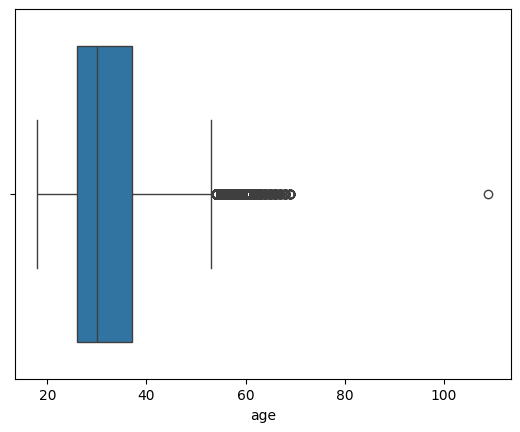

In [3485]:
sns.boxplot(data = df, x = 'age')

In [3486]:
#ages above 100 are removed
df = df[df["age"] <= 100]
df['age'].describe() #resulting distribution looks a lot more realistic

count    58486.000000
mean        32.367746
std          9.447555
min         18.000000
25%         26.000000
50%         30.000000
75%         37.000000
max         69.000000
Name: age, dtype: float64

<Axes: xlabel='age'>

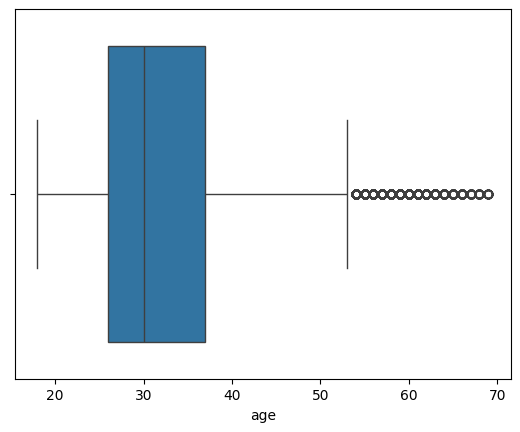

In [3487]:
sns.boxplot(data = df, x = 'age')

### Handling `height` Outliers

Next is handling height, and taking a look immediately at the results of the `.describe()` method we can see  a big problem. our min height is someone who claims to be one inch tall. Moving on to the box plot we can see that a few people are also claiming to have a height smaller than the smallest person in the world Chandra Bahadur Dangi who is 21.5 inches tall. So let's immediately remove these jokers from our dataset.

In [3488]:
df['height'].describe()

count    58486.000000
mean        68.283982
std          3.989634
min          1.000000
25%         66.000000
50%         68.000000
75%         71.000000
max         95.000000
Name: height, dtype: float64

<Axes: xlabel='height'>

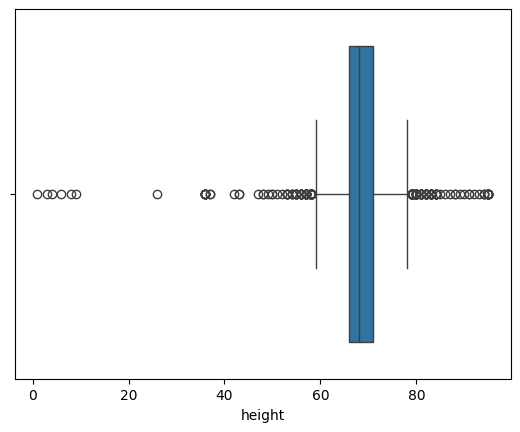

In [3489]:
sns.boxplot(data = df, x = 'height')

In [3490]:
df = df[df["height"] >= 40]
df['height'].describe()

count    58468.000000
mean        68.297222
std          3.909960
min         42.000000
25%         66.000000
50%         68.000000
75%         71.000000
max         95.000000
Name: height, dtype: float64

### Handling `income` outliers

One Thing we can notice about our income attributre is that most of our entries are in the category -1

In [3491]:
df.income.value_counts()

income
-1          47007
 20000       2946
 100000      1612
 80000       1108
 30000       1047
 40000       1004
 50000        972
 60000        736
 70000        705
 150000       627
 1000000      512
 250000       146
 500000        46
Name: count, dtype: int64

In [3492]:
df.loc[df['income'] == -1, 'income'] = 0

### Handling Inconsistent Variables

In [3493]:
df.location.value_counts(dropna = False)

location
san francisco, california    30310
oakland, california           7071
berkeley, california          4105
san mateo, california         1305
palo alto, california         1044
                             ...  
denver, colorado                 1
seattle, washington              1
cincinnati, ohio                 1
phoenix, arizona                 1
rochester, michigan              1
Name: count, Length: 195, dtype: int64

### Body Type Variation

As we can see most people on the site consider themselves to be either average or fit/athletic, you would expect this as most people with societaly dictated "negative" body type would not be confident enough to be on a dating website or less likely to report this feature of themselves accurately. 

In [3494]:
df['body_type'].value_counts(dropna = False)

body_type
average           19222
fit               12476
athletic          11544
thin               4646
curvy              3886
a little extra     2596
skinny             1725
full figured        996
overweight          435
jacked              408
used up             344
rather not say      190
Name: count, dtype: int64

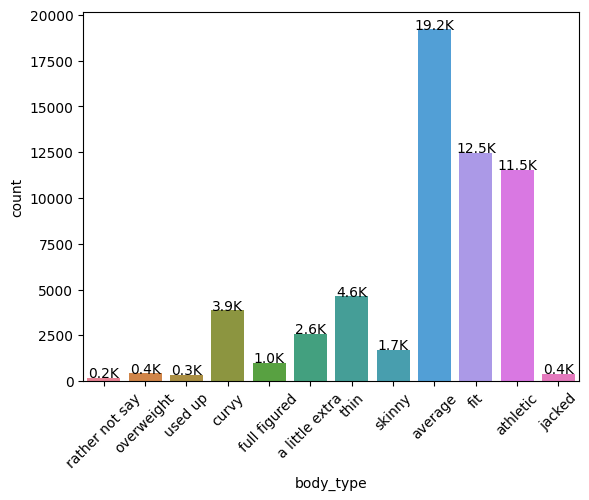

In [3495]:
#My order is based on my own determination of a logical order for the available values for body_type based on my own perception of less fit to most fit
my_order = ['rather not say', 'overweight', 'used up', 'curvy', 'full figured', 'a little extra', 'thin', 'skinny', 'average', 'fit', 'athletic', 'jacked']
ax = sns.countplot(data = df, x = 'body_type', hue = 'body_type', order = my_order, hue_order = my_order)

#Just wanted to put in the count values on top of each bar so as to better interpret the data for ease of interpretability. This is all done in 1000s points for fit.
for axi in ax.patches:
    height = axi.get_height()
    ax.text(axi.get_x()+axi.get_width()/2.,
            height + 3,
            f'{round(axi.get_height() / 1000, 1)}K',
            ha="center")

#rotate labels for no overlap     
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)

plt.show()

### Handling Diet Nulls

So when we look at the diet data we see that a wopping 68% of the data is NA so our users didnt specify diet data.

It would be best to keep set nulls as a new category ("not specified")

In [3496]:
###### I FIND THIS INSUFFICIENT ######
# Probably want to compare the distribution of missing values according to age (maybe other variables) and present values to see if this missingness is actually random 
df['diet'] = df['diet'].fillna('anything')

### Diet Variation

Most people on the site expectedly have little to no dietary restriction or preference. Neglibile amounts of people on the dating site conform to religious diets (Maybe our site isn't that appealling to a religious audience)

In [3497]:

df['diet'].value_counts(dropna= False)

diet
anything      27750
missing       23101
vegetarian     4953
other          1775
vegan           697
kosher          115
halal            77
Name: count, dtype: int64

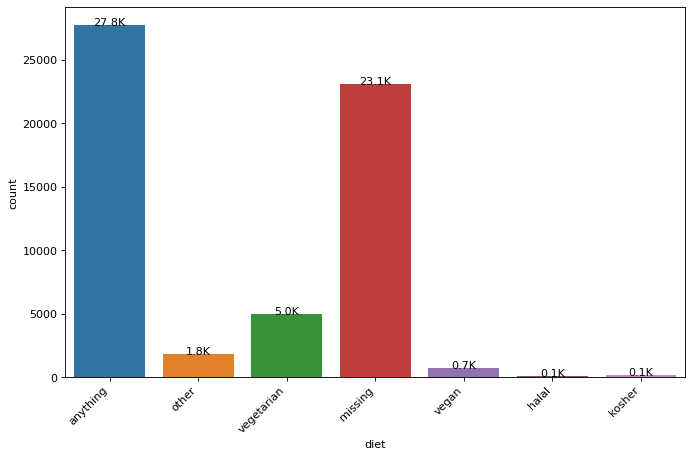

In [3498]:
plt.figure(figsize=(10,6), dpi=80)

ax = sns.countplot(data = df, x = 'diet', hue = 'diet')

#Just wanted to put in the count values on top of each bar so as to better interpret the data for ease of interpretability. This is all done in 1000s points for fit.
for axi in ax.patches:
    height = axi.get_height()
    ax.text(axi.get_x()+axi.get_width()/2.,
            height + 3,
            f'{round(axi.get_height() / 1000, 1)}K',
            ha="center")

#rotate labels for no overlap     
locs, labels = plt.xticks()
plt.setp(labels, rotation=45, ha = "right", x = -0.1)

plt.show()

###  Handling Drinks and Drugs Nulls

So we have a few missing drugs and less amount of missing drinks. This would be a good time to test if people are just leaving the field empty for personal reasons or is it just random?

From looking at the p values of the prevalence of drinks and drugs with other factors such as age, sex, income, edication and religion. 

1. We can see that people with certain religious beliefs are likely to skip drug related questions and to a lesser extent drink related questions.
2. Socioeconomic and demograpgic factors influence response rates for these attributes

In [3499]:
from scipy.stats import chi2_contingency

def chi_square_missing(df, missing_col, categorical_col): # < 0.05 returned suggests MAR
    df_copy = df.copy()
    df_copy['missing'] = df_copy[missing_col].isna().astype(int)

    contingency_table = pd.crosstab(df_copy['missing'], df_copy[categorical_col])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    return p

for col in ['age', 'sex', 'education', 'income', 'religion']:
    p_value = chi_square_missing(df, 'drugs', col)
    print(f"Missingness in drugs vs. {col}: p-value = {p_value}")

    p_value = chi_square_missing(df, 'drinks', col)
    print(f"Missingness in drinks vs. {col}: p-value = {p_value}")

Missingness in drugs vs. age: p-value = 1.0
Missingness in drinks vs. age: p-value = 1.0
Missingness in drugs vs. sex: p-value = 1.0
Missingness in drinks vs. sex: p-value = 1.0


KeyError: 'education'

### Drink and Drugs Variation

While the drinks attribute has a 

In [ ]:
print(df['drugs'].value_counts(dropna = False), "\n")
print(df['drinks'].value_counts(dropna = False))

In [ ]:
ax = sns.countplot(data = df[df['drugs'] != 'never'], x = 'drinks', hue = 'drugs', )
plt.show()

### Education Variation

This attribute is need of serious cleaning!

In [ ]:
edu_desc = df['education'].describe()
print(edu_desc)
df['education'].value_counts()